In [1]:
import pandas as pd

In [2]:
a=pd.read_csv('C:/Users/SRIDHAR/Downloads//Electric_Production.csv')
a

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [3]:
a['DATE']=pd.to_datetime(a['DATE'])

In [4]:
a.set_index('DATE' ,inplace=True)

<AxesSubplot:xlabel='DATE'>

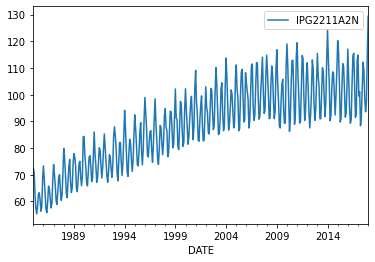

In [5]:
a.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller
b=adfuller(a['IPG2211A2N'])
b

(-2.2569903500472455,
 0.18621469116586759,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

In [8]:
def adf_check (time_series):
    result=adfuller(time_series)
    print('Augmented Dickey Fuller Test')
    labels=('ADF Test Statistic','p-value','#lags','no of obs')
    for value,label in zip (result,labels):
        print(label+':'+str(value))
    if result[1]<=0.05:
            print('strong evidence against null hypothesis and my test series is stationary')
    else:
            print('weak evidence against null hypothesis and my test series is not stationary')
    
    

In [9]:
adf_check(a['IPG2211A2N'])

Augmented Dickey Fuller Test
ADF Test Statistic:-2.2569903500472455
p-value:0.18621469116586759
#lags:15
no of obs:381
weak evidence against null hypothesis and my test series is not stationary


In [11]:
a['IPG2211A2N 1st difference']=a['IPG2211A2N']-a['IPG2211A2N'].shift(1)


In [12]:
adf_check(a['IPG2211A2N 1st difference'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic:-7.104890882267339
p-value:4.0777865655388015e-10
#lags:14
no of obs:381
strong evidence against null hypothesis and my test series is stationary


In [13]:
a['IPG2211A2N sesonal 1st difference']=a['IPG2211A2N 1st difference']-a['IPG2211A2N 1st difference'].shift(12)

In [14]:
adf_check(a['IPG2211A2N sesonal 1st difference'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic:-8.022039209985016
p-value:2.063925209077104e-12
#lags:15
no of obs:368
strong evidence against null hypothesis and my test series is stationary


In [15]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

C:\Users\SRIDHAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


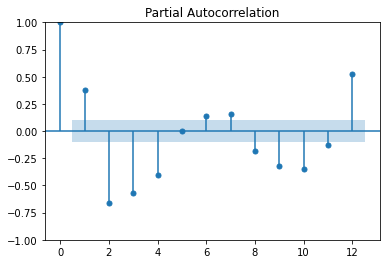

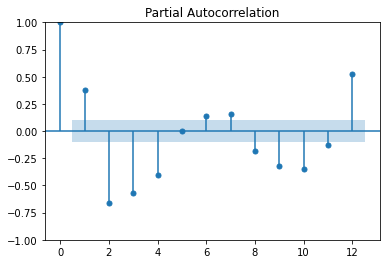

In [16]:
plot_pacf(a['IPG2211A2N 1st difference'].dropna(),lags=12)

C:\Users\SRIDHAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


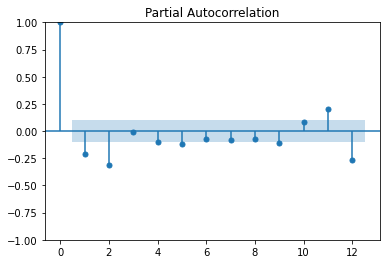

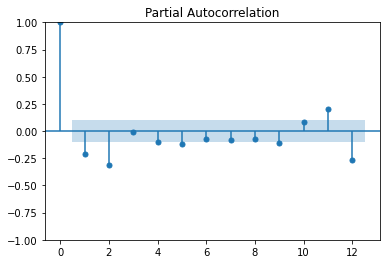

In [17]:
plot_pacf(a['IPG2211A2N sesonal 1st difference'].dropna(),lags=12)

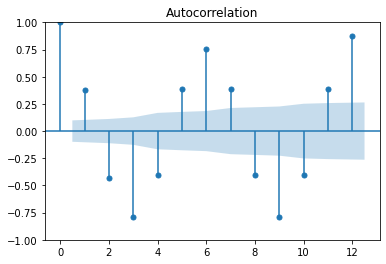

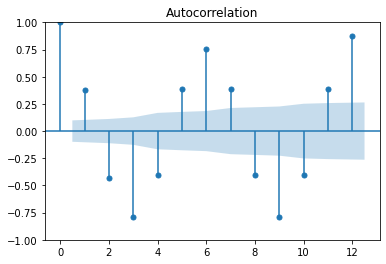

In [18]:
plot_acf(a['IPG2211A2N 1st difference'].dropna(),lags=12)

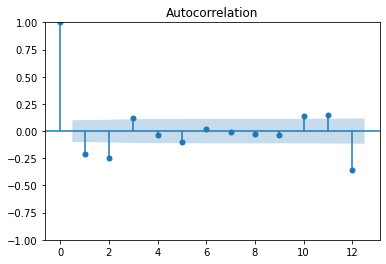

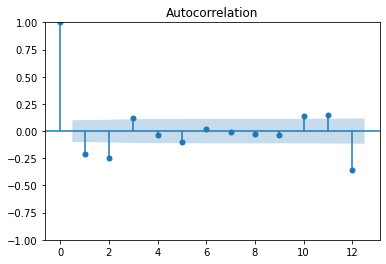

In [19]:
plot_acf(a['IPG2211A2N sesonal 1st difference'].dropna(),lags=12)

In [20]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


In [ ]:
#d=1,#D=1,#p=1,#P=0,#q=1,#Q=0

In [21]:
model=sm.tsa.statespace.SARIMAX(a['IPG2211A2N'],order=(1,1,1),seasonal_order=(1,0,0,12))
result=model.fit()
print(result.summary())

C:\Users\SRIDHAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SRIDHAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                          IPG2211A2N   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -991.573
Date:                             Wed, 14 Sep 2022   AIC                           1991.146
Time:                                     18:07:59   BIC                           2007.072
Sample:                                 01-01-1985   HQIC                          1997.456
                                      - 01-01-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5334      0.040     13.212      0.000       0.454       0.613
ma.L1         -0.9797      

<AxesSubplot:xlabel='DATE'>

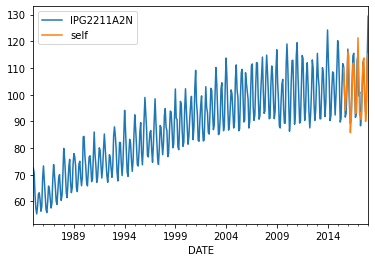

In [22]:
a['self']=result.predict(start=367,end=397)
a[['IPG2211A2N','self']].plot()

In [23]:
a

,IPG2211A2N,IPG2211A2N 1st difference,IPG2211A2N sesonal 1st difference,self
DATE,,,,
1985-01-01,72.5052,NaN,NaN,NaN
1985-02-01,70.6720,-1.8332,NaN,NaN
1985-03-01,62.4502,-8.2218,NaN,NaN
1985-04-01,57.4714,-4.9788,NaN,NaN
1985-05-01,55.3151,-2.1563,NaN,NaN
...,...,...,...,...
2017-09-01,98.6154,-10.3158,2.4364,99.669097
2017-10-01,93.6137,-5.0017,6.2753,90.009808
2017-11-01,97.3359,3.7222,2.3189,94.270928


In [24]:
from pandas.tseries.offsets import DateOffset
future_dates=[a.index[-1]+DateOffset(months=x) for x in range (0,24)]

In [25]:
future_dates

[Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00')]

In [26]:
b=pd.DataFrame(index=future_dates[1:],columns=a.columns)

In [27]:
b

,IPG2211A2N,IPG2211A2N 1st difference,IPG2211A2N sesonal 1st difference,self
2018-02-01,NaN,NaN,NaN,NaN
2018-03-01,NaN,NaN,NaN,NaN
2018-04-01,NaN,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN
2018-09-01,NaN,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN,NaN


In [29]:
c=pd.concat([a,b])
c

,IPG2211A2N,IPG2211A2N 1st difference,IPG2211A2N sesonal 1st difference,self
1985-01-01,72.5052,NaN,NaN,NaN
1985-02-01,70.672,-1.8332,NaN,NaN
1985-03-01,62.4502,-8.2218,NaN,NaN
1985-04-01,57.4714,-4.9788,NaN,NaN
1985-05-01,55.3151,-2.1563,NaN,NaN
...,...,...,...,...
2019-08-01,NaN,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN,NaN


<AxesSubplot:>

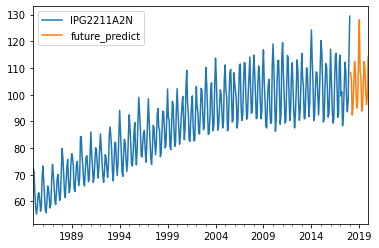

In [31]:
c['future_predict']=result.predict(start=397,end=419)
c[['IPG2211A2N','future_predict']].plot()

In [32]:
c

,IPG2211A2N,IPG2211A2N 1st difference,IPG2211A2N sesonal 1st difference,self,future_predict
1985-01-01,72.5052,NaN,NaN,NaN,NaN
1985-02-01,70.672,-1.8332,NaN,NaN,NaN
1985-03-01,62.4502,-8.2218,NaN,NaN,NaN
1985-04-01,57.4714,-4.9788,NaN,NaN,NaN
1985-05-01,55.3151,-2.1563,NaN,NaN,NaN
...,...,...,...,...,...
2019-08-01,NaN,NaN,NaN,NaN,109.494338
2019-09-01,NaN,NaN,NaN,NaN,100.605621
2019-10-01,NaN,NaN,NaN,NaN,96.292041
2019-11-01,NaN,NaN,NaN,NaN,99.448669
